<a href="https://colab.research.google.com/github/dmortalla/oeson-ogtip/blob/main/Project_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import packages and load the dataset

In [1]:
# Import packages
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns      # For creating more detailed and aesthetic visualizations

In [2]:
# Load the dataset
file_path = '/content/sample_data/car_prices.csv'
car_prices_df = pd.read_csv(file_path)

### 2. Check dataset information and summary statistics

In [3]:
# Display the head, info and summary statistics
car_prices_df.head()
car_prices_df.info()
car_prices_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### 3. Clean the dataset
Remove duplicates

Remove rows with null values in both 'make' and 'model'

Convert necessary columns to appropriate data types

Convert sale date to datetime format and extract year and month from the 'saledate'

Filter out unrealistic data (e.g., condition should be between 1 and 5, and prices should be positive)

In [4]:
# Remove duplicates
cleaned_car_prices_df = car_prices_df.drop_duplicates()

# Remove rows with null values in both 'make' and 'model'
cleaned_car_prices_df = cleaned_car_prices_df.dropna(subset=['make', 'model'])

# Convert necessary columns to appropriate data types
cleaned_car_prices_df['year'] = cleaned_car_prices_df['year'].astype(int)
cleaned_car_prices_df['odometer'] = cleaned_car_prices_df['odometer'].astype(float)
cleaned_car_prices_df['condition'] = cleaned_car_prices_df['condition'].astype(float)
cleaned_car_prices_df['sellingprice'] = cleaned_car_prices_df['sellingprice'].astype(float)
cleaned_car_prices_df['mmr'] = cleaned_car_prices_df['mmr'].astype(float)

# Convert sale date to datetime format
cleaned_car_prices_df['saledate'] = pd.to_datetime(cleaned_car_prices_df['saledate'], utc=True, errors='coerce')

# Extract year and month from the 'saledate'
cleaned_car_prices_df['sale_year'] = cleaned_car_prices_df['saledate'].dt.year
cleaned_car_prices_df['sale_month'] = cleaned_car_prices_df['saledate'].dt.month

# Filter out unrealistic data (e.g., condition should be between 1 and 5, and prices should be positive)
cleaned_car_prices_df = cleaned_car_prices_df[
    (cleaned_car_prices_df['condition'] >= 1) &
    (cleaned_car_prices_df['condition'] <= 5) &
    (cleaned_car_prices_df['sellingprice'] > 0) &
    (cleaned_car_prices_df['mmr'] > 0)
]


<ipython-input-4-945d8ef8ca9d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_car_prices_df['year'] = cleaned_car_prices_df['year'].astype(int)
<ipython-input-4-945d8ef8ca9d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_car_prices_df['odometer'] = cleaned_car_prices_df['odometer'].astype(float)
<ipython-input-4-945d8ef8ca9d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

### 4. Filter columns based on the tasks

In [5]:
# Define the columns we need to keep for the tasks
# The columns needed for the tasks are related to sales trends, vehicle condition, mileage, MMR values, and popularity of makes/models.
# These are the relevant columns: 'year', 'make', 'model', 'condition', 'odometer', 'mmr', 'sellingprice', 'sale_year', 'sale_month'
columns_to_keep = ['year', 'make', 'model', 'condition', 'odometer', 'mmr', 'sellingprice', 'sale_year', 'sale_month']

# Step 2: Filter the dataset to keep only the necessary columns
filtered_car_prices_df = cleaned_car_prices_df[columns_to_keep]


### 5. Check filtered dataset head, information, and summary statistics

In [6]:
filtered_car_prices_df.head()
filtered_car_prices_df.info()
filtered_car_prices_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 68140 entries, 0 to 558833
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          68140 non-null  int64  
 1   make          68140 non-null  object 
 2   model         68140 non-null  object 
 3   condition     68140 non-null  float64
 4   odometer      68135 non-null  float64
 5   mmr           68140 non-null  float64
 6   sellingprice  68140 non-null  float64
 7   sale_year     68140 non-null  float64
 8   sale_month    68140 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.2+ MB


,year,condition,odometer,mmr,sellingprice,sale_year,sale_month
count,68140.000000,68140.000000,68135.000000,68140.000000,68140.000000,68140.000000,68140.000000
mean,2009.787203,3.116539,68377.943891,13796.513428,13170.017244,2014.916554,3.543807
std,5.215179,1.275731,67584.995428,10712.346475,10966.604352,0.276557,3.100091
min,1984.000000,1.000000,1.000000,25.000000,1.000000,2014.000000,1.000000
25%,2007.000000,2.000000,19321.000000,5350.000000,4250.000000,2015.000000,1.000000
50%,2012.000000,3.000000,41353.000000,12800.000000,12000.000000,2015.000000,2.000000
75%,2014.000000,4.000000,106935.000000,18900.000000,18600.000000,2015.000000,5.000000
max,2015.000000,5.000000,999999.000000,176000.000000,165000.000000,2015.000000,12.000000


### 6. Perform EDA with visualizations

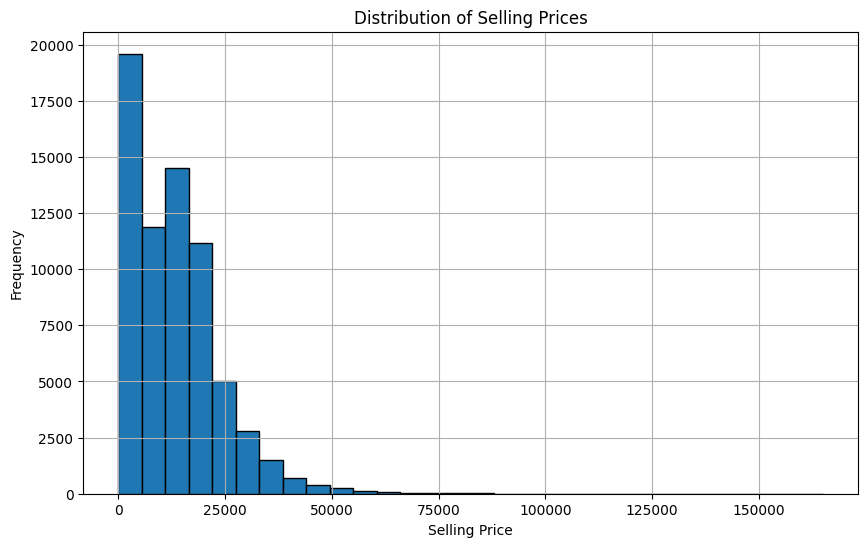

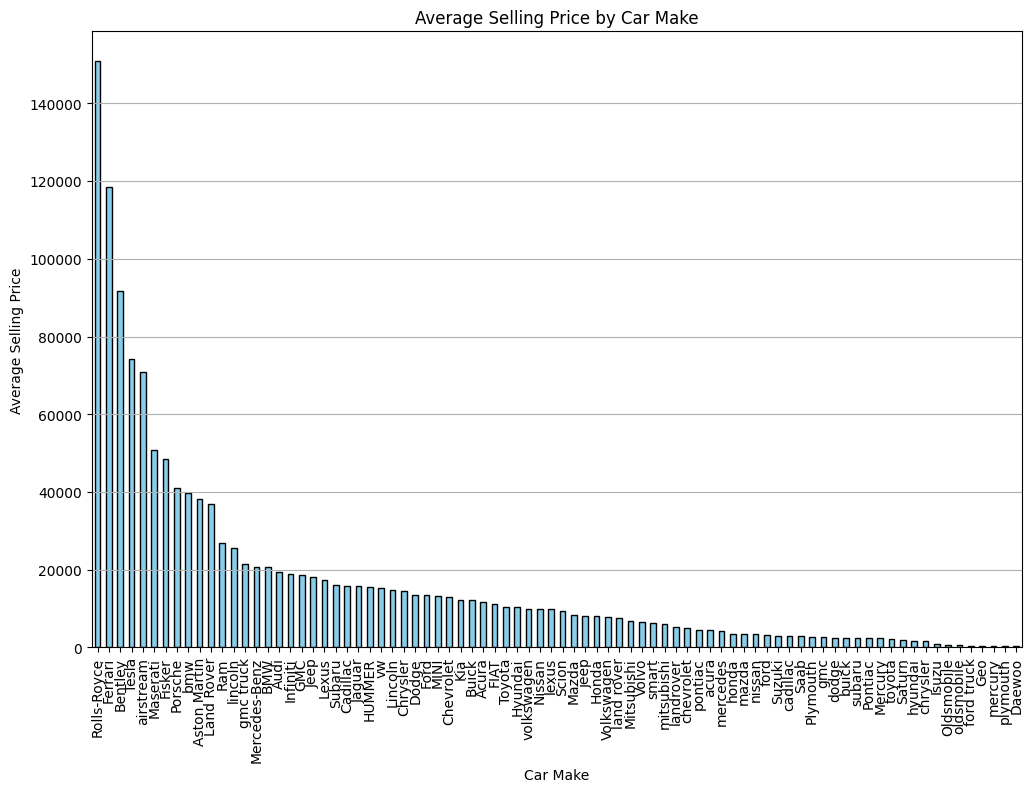

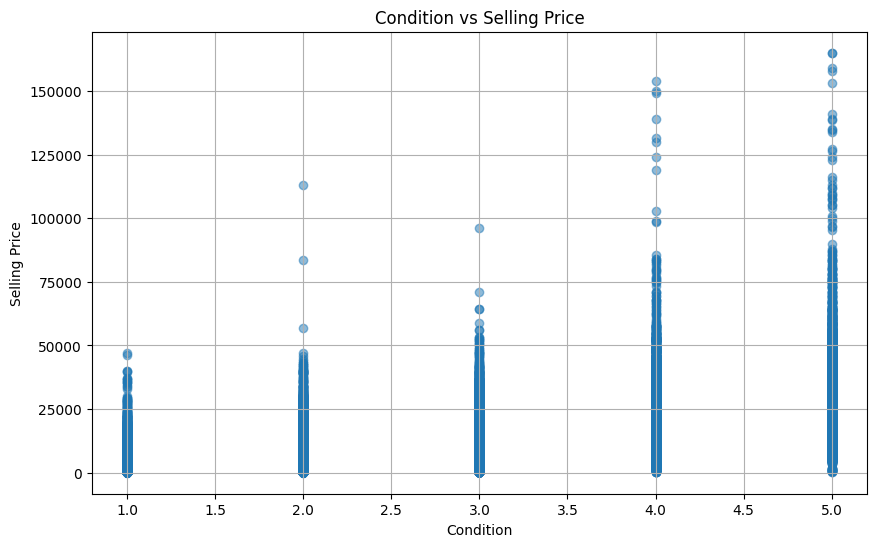

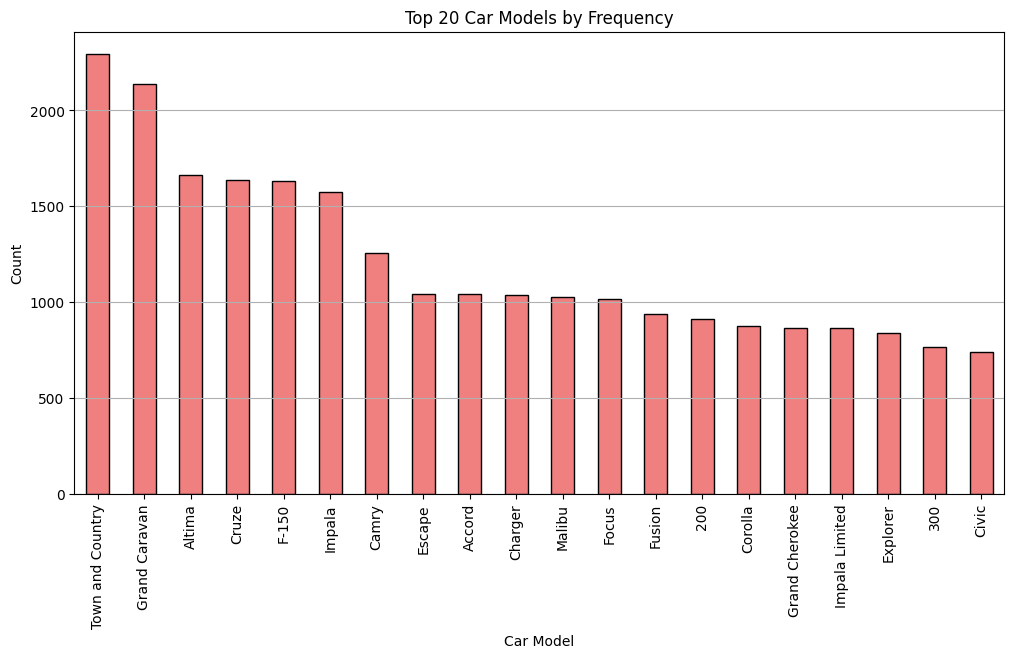

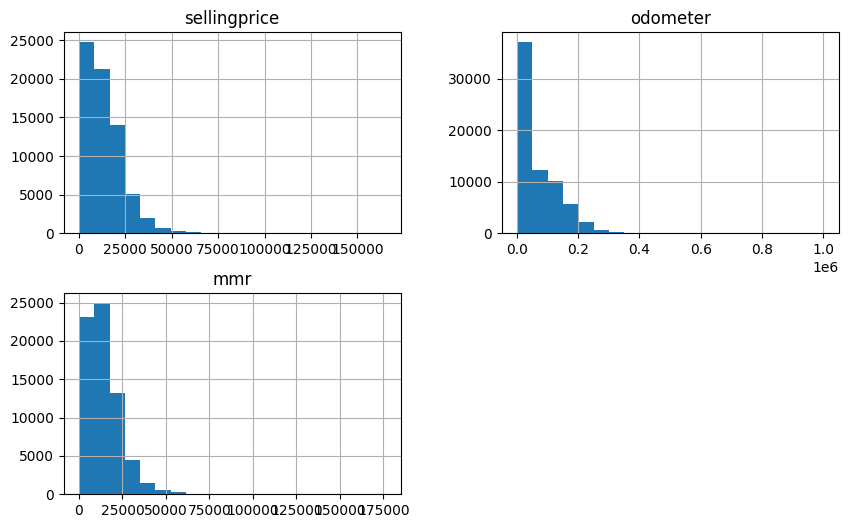

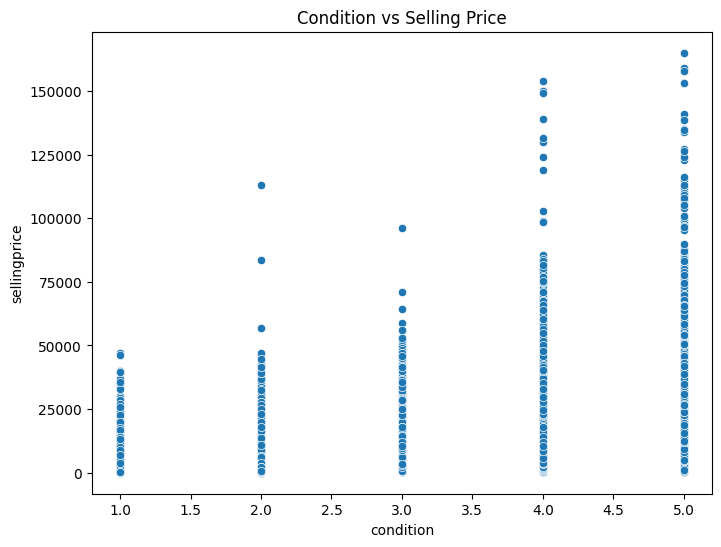

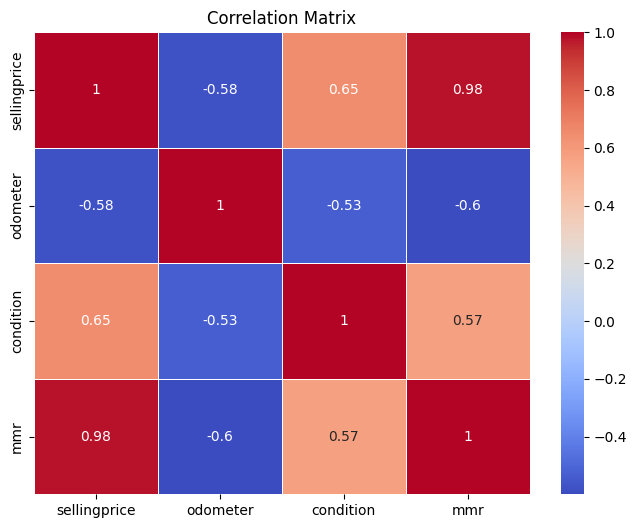

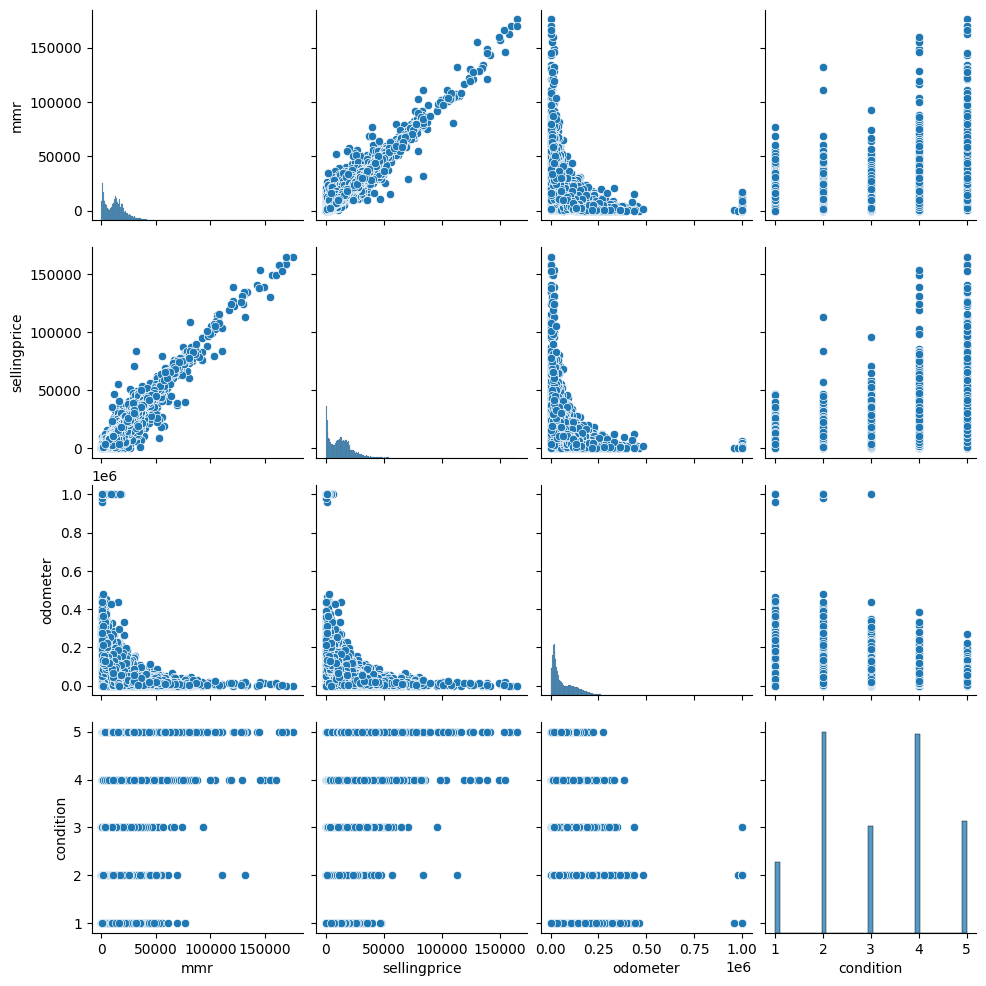

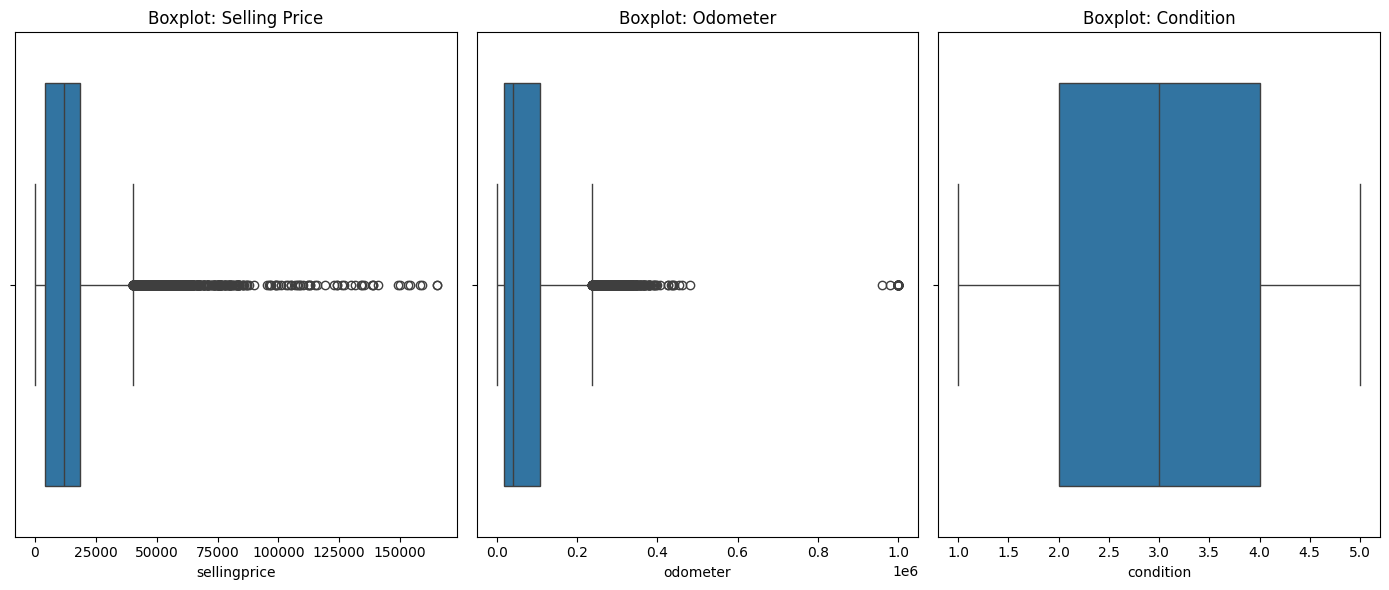

In [7]:
# Distribution of Selling Prices
plt.figure(figsize=(10,6))
plt.hist(cleaned_car_prices_df['sellingprice'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Average Selling Price by Car Make
plt.figure(figsize=(12,8))
avg_price_by_make = cleaned_car_prices_df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_make.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Selling Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Selling Price')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

# Condition vs Selling Price Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(cleaned_car_prices_df['condition'], cleaned_car_prices_df['sellingprice'], alpha=0.5)
plt.title('Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Top 20 Car Models by Frequency
plt.figure(figsize=(12,6))
top_models = cleaned_car_prices_df['model'].value_counts().nlargest(20)
top_models.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 20 Car Models by Frequency')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Univariate Analysis: Histograms for sellingprice, odometer, mmr
filtered_car_prices_df[['sellingprice', 'odometer', 'mmr']].hist(bins=20, figsize=(10, 6))
plt.show()

# Bivariate Analysis: Scatter plot for condition vs sellingprice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='condition', y='sellingprice', data=filtered_car_prices_df)
plt.title('Condition vs Selling Price')
plt.show()

# Correlation Matrix
# Select only numeric columns for correlation analysis
numeric_columns = ['sellingprice', 'odometer', 'condition', 'mmr']
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_car_prices_df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Optional: Pairplot for deeper understanding of relationships
sns.pairplot(filtered_car_prices_df[['mmr', 'sellingprice', 'odometer', 'condition']])
plt.show()

# Step 5: Outlier Detection
# Boxplots to visualize extreme values for sellingprice, odometer, and condition
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=filtered_car_prices_df['sellingprice'])
plt.title('Boxplot: Selling Price')

plt.subplot(1, 3, 2)
sns.boxplot(x=filtered_car_prices_df['odometer'])
plt.title('Boxplot: Odometer')

plt.subplot(1, 3, 3)
sns.boxplot(x=filtered_car_prices_df['condition'])
plt.title('Boxplot: Condition')

plt.tight_layout()
plt.show()


### Task 1: Identify Trends in Vehicle Sales Over Time

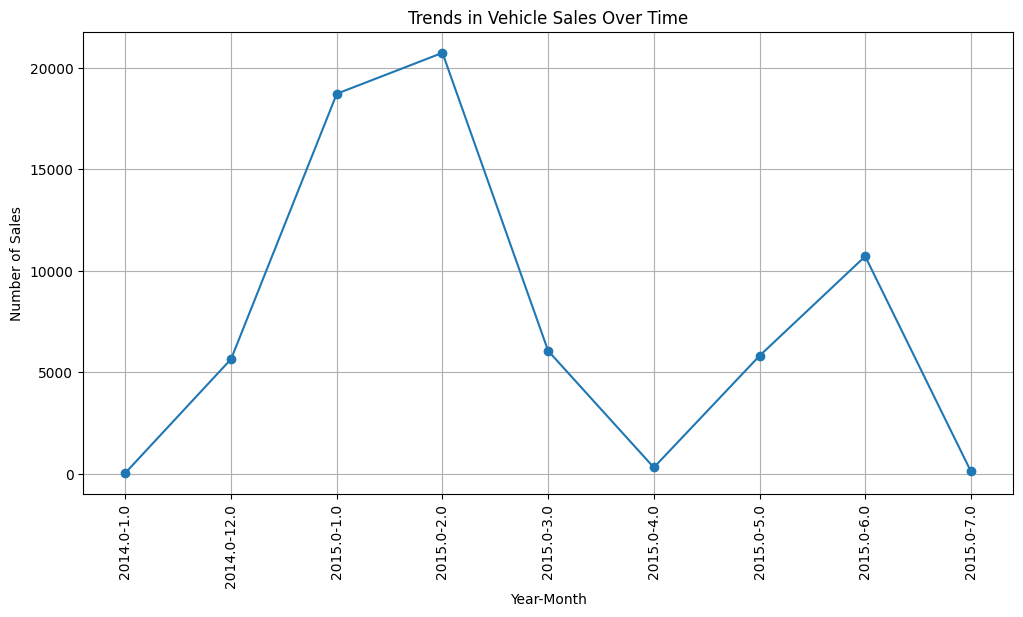

In [8]:
# Group the data by year and month to analyze the trends in vehicle sales over time
sales_trends = filtered_car_prices_df.groupby(['sale_year', 'sale_month']).size().reset_index(name='sales_count')

# Plotting the sales trends over time
plt.figure(figsize=(12,6))
plt.plot(sales_trends['sale_year'].astype(str) + '-' + sales_trends['sale_month'].astype(str),
         sales_trends['sales_count'], marker='o')
plt.title('Trends in Vehicle Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Task 2: Analyze the Impact of Vehicle Condition and Mileage on Selling Prices

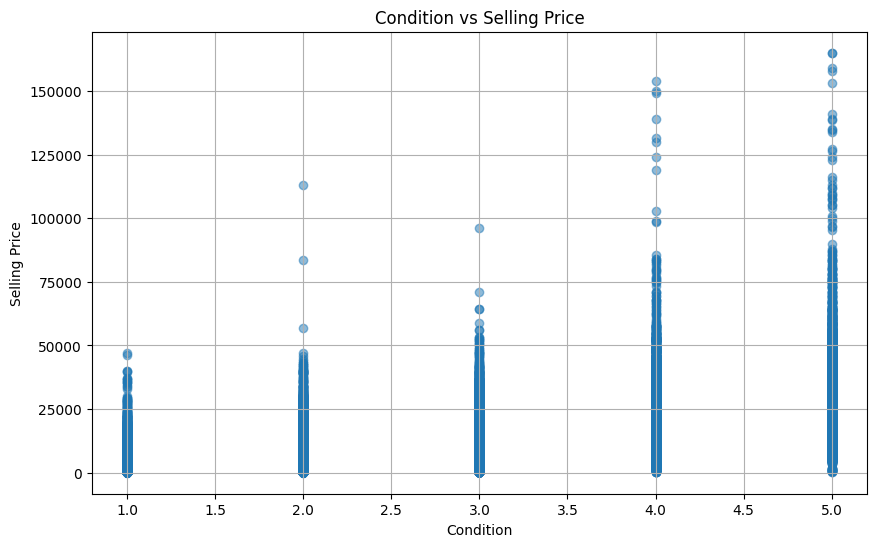

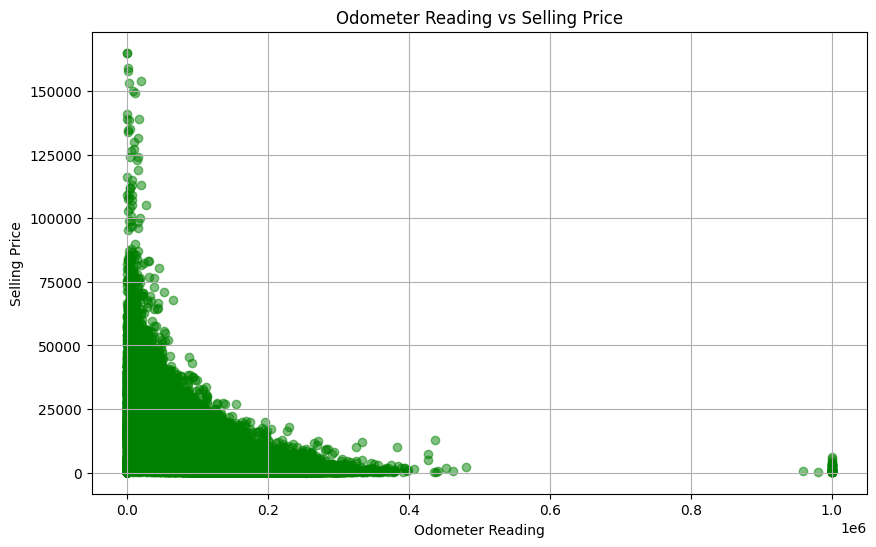

In [9]:
# Scatter plot for condition vs selling price
plt.figure(figsize=(10,6))
plt.scatter(filtered_car_prices_df['condition'], filtered_car_prices_df['sellingprice'], alpha=0.5)
plt.title('Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

# Scatter plot for odometer vs selling price
plt.figure(figsize=(10,6))
plt.scatter(filtered_car_prices_df['odometer'], filtered_car_prices_df['sellingprice'], alpha=0.5, color='green')
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Task 3: Understand the Relationship Between MMR Values and Actual Selling Prices

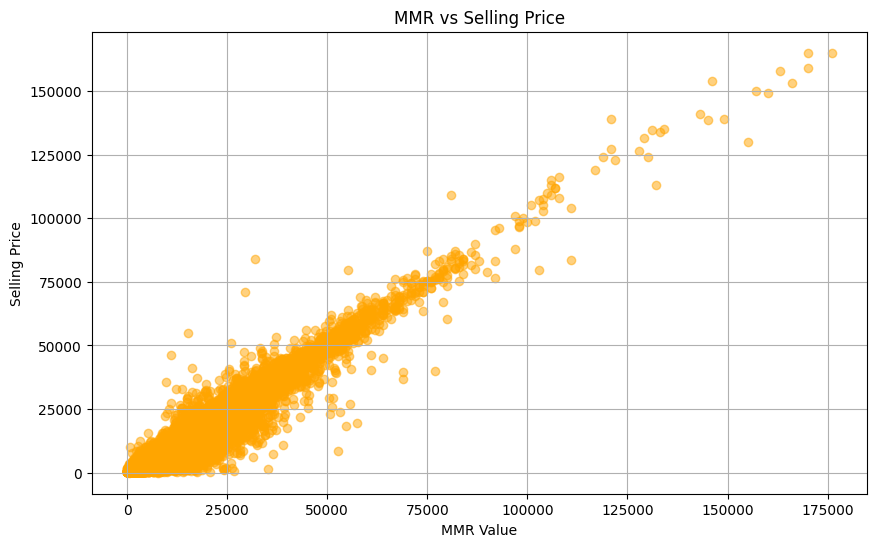

In [10]:
# Scatter plot comparing MMR values and selling prices
plt.figure(figsize=(10,6))
plt.scatter(filtered_car_prices_df['mmr'], filtered_car_prices_df['sellingprice'], alpha=0.5, color='orange')
plt.title('MMR vs Selling Price')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Task 4: Determine the Most Popular Vehicle Makes and Models

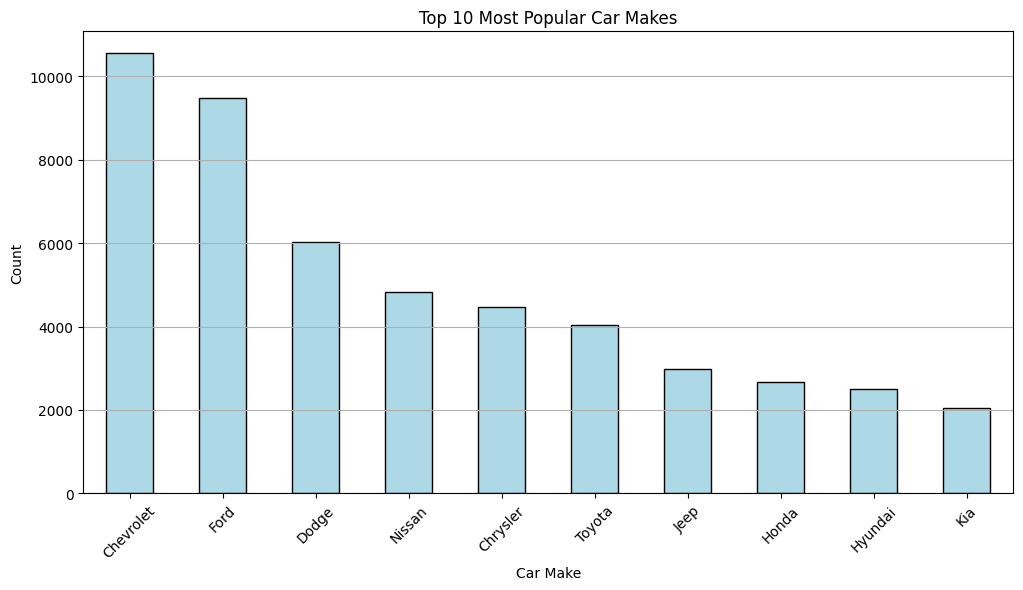

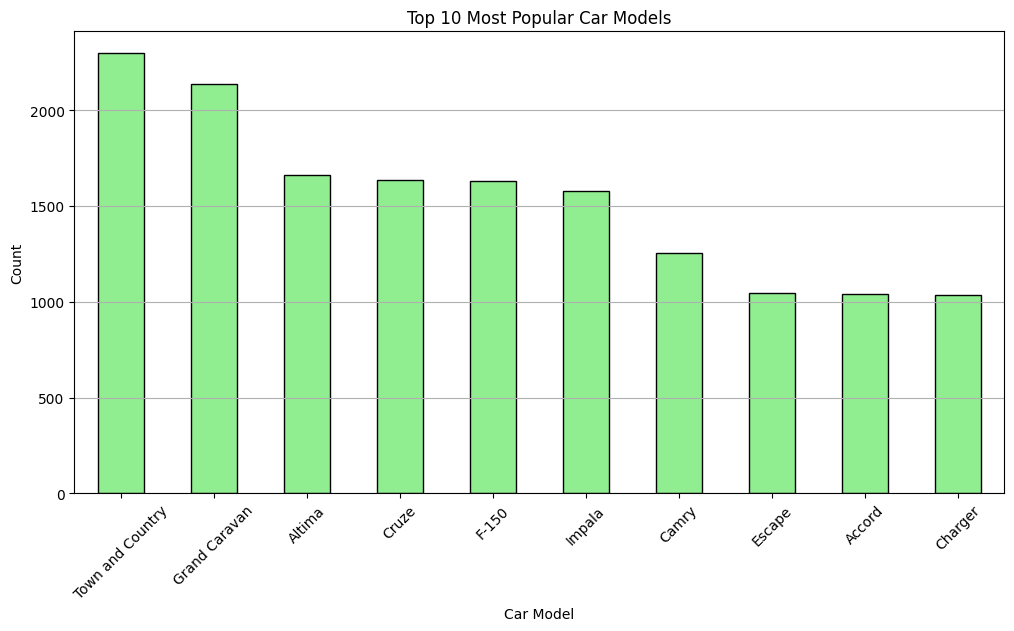

In [11]:
# Most popular car makes
plt.figure(figsize=(12,6))
top_makes = filtered_car_prices_df['make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Most popular car models
plt.figure(figsize=(12,6))
top_models = filtered_car_prices_df['model'].value_counts().nlargest(10)
top_models.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Most Popular Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()